                                    Table of Content
1. Introduction
2. Imports
3. Data wrangling
4. Exploratory Data Analysis
5. Conclusion

                                        INTRODUCTION
In this project,I will be investigating a data set that contains data on movies produced from 1960 to 2016, with data like the movies budget,revenue,genres,production companies, directors,cast, release_date,release_year and popularity. 


                                         QUESTIONS:
1. Which movie has the highest revenues and budget?
2. Which movie made the highest profits?
3. Which production companies produced the movies with the highest revenue and budget.
4. What movies are the most popular?
5. Which year has the highest release date of movies? 
6. Which months have the highest release date?
7. Which genres is the most popular and the year?
8. Who directed the movies with the highest profits?
9. What movies have the longest runtime?

                                        IMPORTS

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

                                    DATA WRANGLING

In [95]:
#To read your data file,use the 'read_csv'.
data_mv = pd.read_csv(r'C:\Users\Charles\Desktop\tmdb-movies.csv')
#Show the first 5 lines of your data,if you switch .head to .tail, you will get the last 5. 
data_mv.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [96]:
#To get the numbers of rows and columns in your data. 
data_mv.shape

(10866, 21)

In this case, we have 10,866 rows & 21 columns

In [97]:
#To get summary of your data of columns with numeric values.
data_mv.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [98]:
#To get summary of my data and identify the null values and the complete titles of the data in the columns section
data_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [99]:
#To get the total missing values in my data
data_mv.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [100]:
#To fill in missing null values with 0
data_mv.fillna(value=0, inplace=True)

data_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10866 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              10866 non-null  object 
 8   director              10866 non-null  object 
 9   tagline               10866 non-null  object 
 10  keywords              10866 non-null  object 
 11  overview              10866 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  10866 non-null  object 
 15  release_date       

                                    Data Cleaning 

In [101]:
#To have a clear view of my columns,so as to know which will be required for my anaylsis.
data_mv.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [102]:
#There are 21 columns in the dataset,I will be dropping some columns because they are not required in my analysis.
data_mv.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj'], axis=1, inplace=True)

data_mv.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [103]:
#To change the release_date format to datetime.
data_mv['release_date'] = pd.to_datetime(data_mv['release_date'])
data_mv['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [104]:
#Since I will be using the budget and revenue,so I need to round of their values to the nearest millions. 
#we divide the both columns by 1,000,000. And create new columns for them. 
data_mv['£ budget']= (data_mv['budget'].astype(float)/1000000).round(2).astype(str) + 'M'
data_mv['£ revenue']= (data_mv['revenue'].astype(float)/1000000).round(2).astype(str) + 'M'

data_mv.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,release_year,£ budget,£ revenue
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,150.0M,1513.53M
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,150.0M,378.44M
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,110.0M,295.24M
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,200.0M,2068.18M
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,190.0M,1506.25M


In [105]:
#To identify the number of duplicates in your data
data_mv.duplicated().sum()

1

In [106]:
#To drop your duplicates: 
data_mv.drop_duplicates(inplace = True)


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'release_year'}>]], dtype=object)

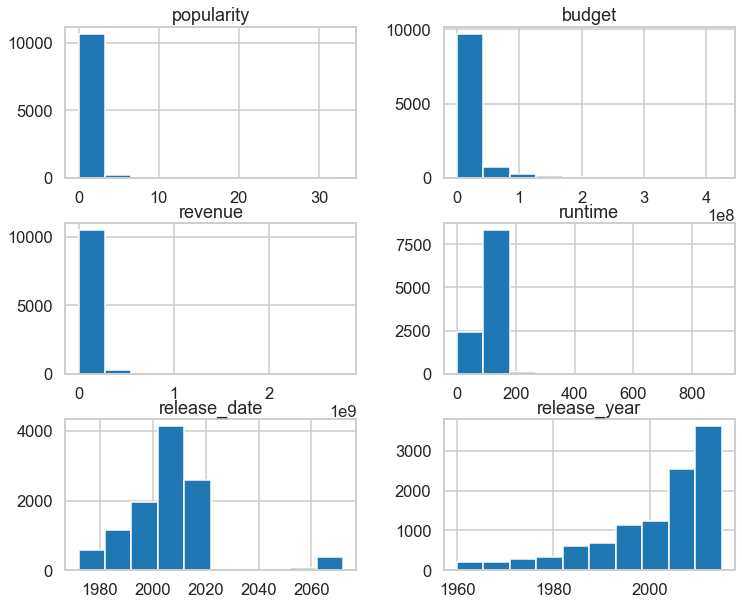

In [107]:
#To get a histogram of our complete data.
data_mv.hist(figsize=(12,10))

In [108]:
data_mv.to_csv('my_movies_data_set')

                            EXPLORATORY ANALYSIS

In [109]:
#We will import our seaborn to use for our plots. 
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('pastel')[0:5]

1. Which movie have the highest revenues and budget?

In [110]:
def find_min_max(revenue):
    #using idxmin() & idxmax() functions to find max and min value of revenue.
    max_index = data_mv[revenue].idxmax()
    min_index = data_mv[revenue].idxmin()
    #select the highest and lowest value from revenue 
    high = pd.DataFrame(data_mv.loc[max_index,:])
    low  = pd.DataFrame(data_mv.loc[min_index,:])

    return pd.concat([high,low], axis=1)

In [111]:
find_min_max('revenue')

,1386,48
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
release_year,2009,2015


In [112]:
find_min_max('budget')

,2244,30
popularity,0.25054,3.927333
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
production_companies,Boram Entertainment Inc.,BBC Films|See-Saw Films|FilmNation Entertainme...
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00
release_year,2010,2015


From the above analysis, Avatar was the movie with the highest revenue and The Warrior's Way is the movie with the highest budget. 

2.Which movie made the highest profit?

In [113]:
#To get the first movies with the highest profit. 
data_mv['profit'] = data_mv['revenue'] - data_mv['budget']

In [114]:
data_mv['£ profit'] = (data_mv['profit'].astype(float)/1000000).round(2).astype(str) + 'M'

In [115]:
#To get the 10 top movies with the highest profit. 
data_mv.sort_values(by=['profit'], ascending = False, inplace=True, ignore_index=True)
highest_10_pr= data_mv.loc[0:9, ('original_title','£ profit','profit')]
highest_10_pr['£ profit'] = highest_10_pr['profit'].apply(lambda r: r/1000000).round(2)
print(highest_10_pr)

                                 original_title  £ profit      profit
0                                        Avatar   2544.51  2544505847
1                  Star Wars: The Force Awakens   1868.18  1868178225
2                                       Titanic   1645.03  1645034188
3                                Jurassic World   1363.53  1363528810
4                                     Furious 7   1316.25  1316249360
5                                  The Avengers   1299.56  1299557910
6  Harry Potter and the Deathly Hallows: Part 2   1202.82  1202817822
7                       Avengers: Age of Ultron   1125.04  1125035767
8                                        Frozen   1124.22  1124219009
9                                       The Net   1084.28  1084279658


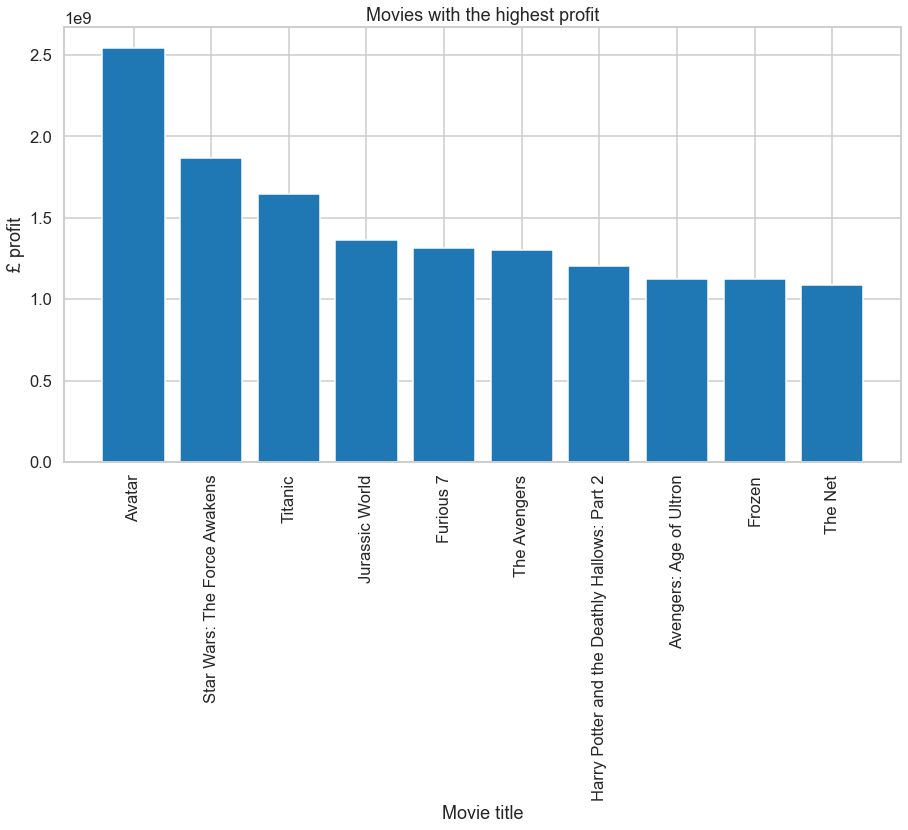

In [116]:
plt.figure(figsize=(15,8))
plt.bar(highest_10_pr['original_title'],highest_10_pr['profit'])
plt.ylabel('£ profit')
plt.xlabel('Movie title')
plt.xticks(rotation=90)
plt.title('Movies with the highest profit')
plt.show()

As we can see on the Histogram above,the first 3 movies with the highest profit are Avatar,which generated over 2.5 billion Euros, followed by Star Wars: The Force Awakens with almost 1.8 billion Euros, and Titanic with 1.6 billion Euros. 

3.Which movie company produced the movies with the highest revenues and budget?

In [117]:
#To get the production companies with the highest revenue.
data_mv.sort_values(by=['revenue'], ascending = False, inplace=True, ignore_index=True)
highest_10_pdcrv= data_mv.loc[0:9, 'production_companies']
print(highest_10_pdcrv)

0    Ingenious Film Partners|Twentieth Century Fox ...
1            Lucasfilm|Truenorth Productions|Bad Robot
2    Paramount Pictures|Twentieth Century Fox Film ...
3                                       Marvel Studios
4    Universal Studios|Amblin Entertainment|Legenda...
5    Universal Pictures|Original Film|Media Rights ...
6    Marvel Studios|Prime Focus|Revolution Sun Studios
7    Warner Bros.|Heyday Films|Moving Picture Compa...
8    Walt Disney Pictures|Walt Disney Animation Stu...
9                                       Marvel Studios
Name: production_companies, dtype: object


In [118]:
highest_10_pdcrv['production_companies']=data_mv['production_companies'].astype(str)
all_highest_10_pdcrv = highest_10_pdcrv['production_companies'].str.cat(sep = '|')
all_highest_10_pdcrv = pd.Series(all_highest_10_pdcrv.split('|'))
all_highest_10_pdcrv.nunique()


7880

In [119]:
#To get the production companies with the highest revenue.
data_mv.sort_values(by=['revenue'], ascending = False, inplace=True, ignore_index=True)
highest_10_pdcrv= data_mv.loc[0:, 'production_companies']
highest_10_pdcrv

0        Ingenious Film Partners|Twentieth Century Fox ...
1                Lucasfilm|Truenorth Productions|Bad Robot
2        Paramount Pictures|Twentieth Century Fox Film ...
3                                           Marvel Studios
4        Universal Studios|Amblin Entertainment|Legenda...
                               ...                        
10860                                                    0
10861      Kinowelt Filmproduktion|MedienKontor Movie GmbH
10862                                          WWE Studios
10863                                                    0
10864    thinkfilm|Starz Entertainment|Candy Heart Prod...
Name: production_companies, Length: 10865, dtype: object

In [120]:
#To get the production companies with the highest budget.
data_mv.sort_values(by=['budget'], ascending = False, inplace=True, ignore_index=True)
highest_10_pdcbd= data_mv.loc[0:, 'production_companies']
highest_10_pdcbd

0                                 Boram Entertainment Inc.
1        Walt Disney Pictures|Jerry Bruckheimer Films|M...
2        Walt Disney Pictures|Jerry Bruckheimer Films|S...
3        Marvel Studios|Prime Focus|Revolution Sun Studios
4        DC Comics|Legendary Pictures|Warner Bros.|Bad ...
                               ...                        
10860                                     Lindisfarne SPV1
10861                                                    0
10862                               Against the Wild Films
10863    CTB Film Company|Realitism Films|Rubber Films|...
10864    thinkfilm|Starz Entertainment|Candy Heart Prod...
Name: production_companies, Length: 10865, dtype: object

As we can see from the analysis above ,the production companies - Ingenious Film Partners|Twentieth Century Fox produced the movies with the  highest revenue,while Boram Entertainment Inc. produced the movie with the highest budget.

4.Which movies are the most popular? 

In [121]:
#To get the 10 most popular movies
data_mv.sort_values(by='popularity', ascending = False, inplace=True, ignore_index=True)
highest_10_pop= data_mv.loc[0:9, 'original_title']
print(highest_10_pop)


0                           Jurassic World
1                       Mad Max: Fury Road
2                             Interstellar
3                  Guardians of the Galaxy
4                                Insurgent
5      Captain America: The Winter Soldier
6                                Star Wars
7                                John Wick
8             Star Wars: The Force Awakens
9    The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object


As we can see the most popular movie is Jurassic World,followed by Mad Max: Fury Road and Intersellar. 

5.Which year has the highest release_date of movies?

In [122]:
data_mv_year= data_mv.groupby('release_year').count()['original_title'].to_frame()

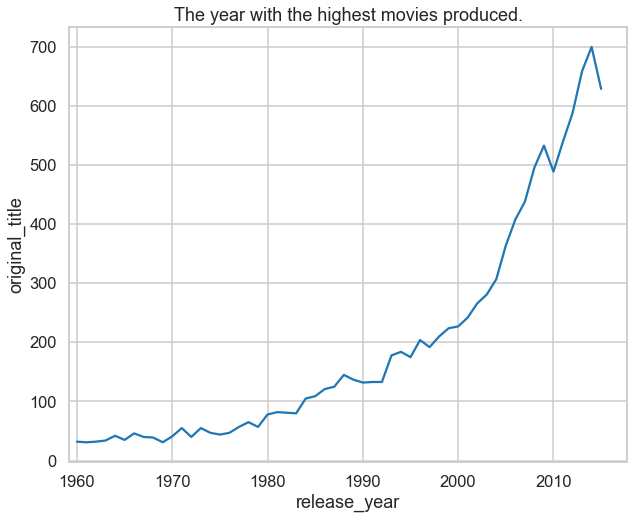

In [123]:
plt.figure(figsize=(10,8))
sns.lineplot(x=data_mv_year.index, y= data_mv_year.original_title)
plt.title('The year with the highest movies produced.')
plt.xlim(1959.2017)
plt.show()

As we can see the line plot above, the year with the highest movies produced is in 2014. 

6.Which months have the highest release_date?

C:\Users\Charles\anaconda3\Udacity\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


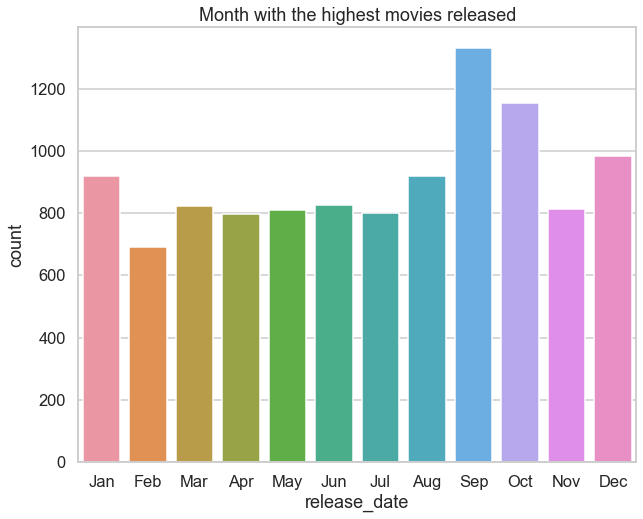

In [124]:
plt.figure(figsize=(10,8))
sns.countplot(data_mv.release_date.dt.month)
plt.title('Month with the highest movies released')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],

['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

As we can see from our data above, September is the month with the highest movies produced. Followed by the month of October and December. 

7.Which genres is the most popular from year to year?

In [125]:
#To get the most popular genres with from year to year. 
data_mv.sort_values(by=['popularity'], ascending = False ,inplace=True, ignore_index=True)
highest_gnr= data_mv.loc[0:, 'genres' ]
print(highest_gnr)


0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2                  Adventure|Drama|Science Fiction
3                 Action|Science Fiction|Adventure
4               Adventure|Science Fiction|Thriller
                           ...                    
10860                                       Comedy
10861                               Comedy|Mystery
10862                                       Comedy
10863                         Mystery|Comedy|Drama
10864                        Drama|History|Western
Name: genres, Length: 10865, dtype: object


In [126]:
#To get the number of genres in my data set
highest_gnr['genres']=data_mv['genres'].astype(str)
all_highest_10_gn = highest_gnr['genres'].str.cat(sep = '|')
all_highest_10_gn = pd.Series(all_highest_10_gn.split('|'))
print(all_highest_10_gn.nunique())

21


In [127]:
#To count how many times the genres was used in our data set
count_data_mv= all_highest_10_gn.value_counts(ascending=False)
count_data_mv.head(5)

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64

From the above analysis, Drama is the most popular ,followed by  Comedy,Thriller,Action,and Romance respectively.

8.Who directed the movies with the highest profits?

In [128]:
#To get the directors that directed the movies with high profits. 
data_mv.sort_values(by=['profit'], ascending = False, inplace=True, ignore_index=True)
highest_10_dir= data_mv.loc[0:9, ('director','original_title')]
print(highest_10_dir)

                  director                                original_title
0            James Cameron                                        Avatar
1              J.J. Abrams                  Star Wars: The Force Awakens
2            James Cameron                                       Titanic
3          Colin Trevorrow                                Jurassic World
4                James Wan                                     Furious 7
5              Joss Whedon                                  The Avengers
6              David Yates  Harry Potter and the Deathly Hallows: Part 2
7              Joss Whedon                       Avengers: Age of Ultron
8  Chris Buck|Jennifer Lee                                        Frozen
9            Irwin Winkler                                       The Net


From the analysis above, James Cameron is the director with the highest profit, from the movie Avatar. 

9.What movie have the longest runtime?

In [131]:
#To get info on the movies with the longest runtime. 
data_mv.sort_values(by=['runtime'], ascending = False, inplace=True, ignore_index=True)
highest_10_run= data_mv.loc[0:9,('original_title','runtime')]
print(highest_10_run)

                  original_title  runtime
0  The Story of Film: An Odyssey      900
1                          Taken      877
2               Band of Brothers      705
3                          Shoah      566
4        North and South, Book I      561
5                   Planet Earth      550
6                    The Pacific      540
7                     John Adams      501
8                           Life      500
9                Generation Kill      470


<function matplotlib.pyplot.show(close=None, block=None)>

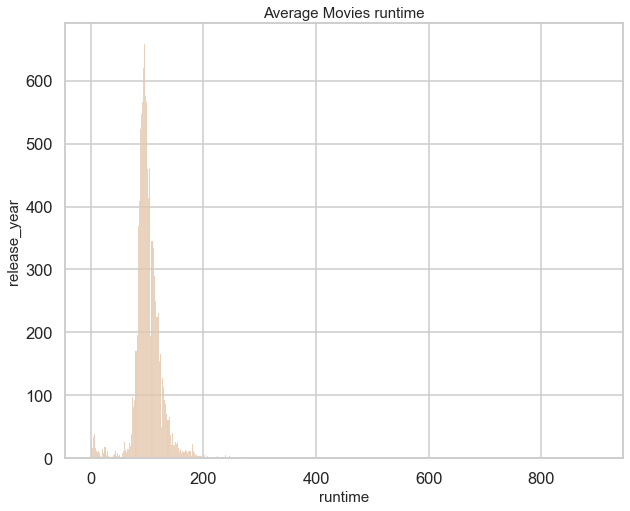

In [132]:
#To get the average movie runtime. 
plt.figure(figsize=(10,8))
run_time= sns.histplot(data_mv['runtime'], color = sns.color_palette('pastel')[5])
run_time.axes.set_title('Average Movies runtime', fontsize=15)
run_time.set_xlabel('runtime', fontsize=15)
run_time.set_ylabel('release_year', fontsize=15)
plt.show

As we can see from the plot above, most movies have an average of 1hours30mins.'The Story of Film: An Odyssey' is the movie with the longest run time of 15hours. 

                                Conclusions

1.The movies with the highest profits are Avatar, Star Wars:Star Wars: The Force Awakens and Titanic.
2.The most popular movies are Jurassic World,Mad Max: Fury Road,and Interstellar.
3.The  year 2014 saw the highest release of movies. 
4.The month of September,October and December are the best time to release movies,while Febraury is the least month for movie release. 
5.The most popular genres are - Drama,followed by  Comedy,Thriller,Action,and Romance respectively.
6.The movie director is an important factor when it comes to movies production,two directors stand out with the movies with the highest profits. James Cameron and Joss Whedon. 
7.The Story of film : An Odyssey has the longest runtime of 15 hours and movie runtime have reduced with years. 

My limitation is the with some rows in my dataset, that have 0 has their values, its giving me some errors in visualization of certain data values. 

Reference: GeekforGeeks.org,PythonGuides.com,w3resource.com
